
## Old

In [105]:
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

print("Training MLPRegressor...")
tic = time()
mlp_model = make_pipeline(
    MLPRegressor(
        hidden_layer_sizes=(30, 15),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0,
    ),
)
# mlp_model.fit(X_train, y_train)
# print(f"done in {time() - tic:.3f}s")
# print(f"Test R2 score: {mlp_model.score(X_test, y_test):.2f}")

Training MLPRegressor...


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
import xlrd
import sklearn
import math
import os
import re
import copy
from numba import njit
from numba import prange
import plotly

plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [107]:
import torch
from torch import nn
from torch.utils.data import DataLoader
# from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [108]:
# !pip install pytorch_forecasting
# from pytorch_forecasting.metrics import MAE, SMAPE, MultiLoss


In [109]:
# !pip install tqdm
from tqdm import trange
import json

In [110]:
sns.set(rc={'figure.figsize': (9,6)})

In [111]:
colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
#colours_ = ['mediumpurple', 'mediumpurple', 'blue', 'blue', 'mediumpurple', 'black', 'brown', 'gray']
# colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
markers_ = ['-', '-', '-', '-', '-']
# markers_ = ['-', '.', '*', 'd', '.-', '^', 'v', 'o']
linestyle = ['-', '-.', '-*', ':', '--', '-o', '-d', '-x']

In [112]:
# #В данном списке содержатся величины выходных радиусов исследуемых волок
# R1 = [(0.412) / 2, (0.738) / 2, (2.23) / 2]
# R0 = [(0.420) / 2, (0.771) / 2, (2.45) / 2]

# D1 = [(0.412) / 1000, (0.738) / 1000, (2.23) / 1000]

In [113]:
R0 = 0.036/2

In [114]:
def average_in_list(list):
    # print(list)
    summ = 0
    for i in list:
        summ += i
    return summ / len(list)

In [115]:
def read_data_txt_np(name_of_file, example_dir):
    data_flag = 0
    content = os.listdir(example_dir)
    if os.path.isfile(os.path.join(example_dir, name_of_file)):
        if name_of_file in content:
            file = os.path.join(example_dir, name_of_file)
            if file.endswith('.txt'):
                # data = np.loadtxt(file, dtype='double', skiprows=56) #thermal
                data = np.loadtxt(file, dtype='double', skiprows=44) #isothermal
                data_flag = 1
            else:
                print(f'{file} doesnt ends with .txt')
        else: 
            print(f"No file {name_of_file} in such dir")
    else:
        print(f"No such file {name_of_file}")
        return -1
    return data 

In [116]:
def files_list(list_one, dir_):
    list_files = []
    for i in range(0, len(list_one)):
        file = read_data_txt_np(list_one[i], dir_)
        list_files.append(file)

    return list_files

In [117]:
def median_np(x):
    """ Построение медианы по переданному списку """
    return np.median(x)

In [118]:
#@njit(parallel=True)
def preprocessing_res_np(file):
    """
    Создание np.array по репорту
    """
    x_1 = (file[::, 1]) * 10 ** 3
    y_1 = (file[::, 2]) * 10 ** 3

    eps_11_name = file[::, 11]
    eps_22_name = file[::, 12]
    eps_33_name = file[::, 13]
    eps_12_name = file[::, 14]

    stress_11_name = (file[::, 3]) / 10 ** 6
    stress_22_name = (file[::, 4]) / 10 ** 6
    stress_33_name = (file[::, 5]) / 10 ** 6
    stress_12_name = (file[::, 6]) / 10 ** 6

    #nt11_name = (file[::,15])
    #temp_name = (file[::,16])

    index = 0

    x_1_ = np.zeros((1, 1))
    y_1_ = np.zeros((1, 1))
    Strain = np.zeros((1, 5))
    Stress = np.zeros((1, 5))
    #NT11 = np.zeros((1, 1))
    #TEMP = np.zeros((1, 1))
    #ind_ = np.zeros((1,1))
    for j in range(0, np.shape(y_1)[0]):
        if y_1[j] >= 0.25 * (np.max(y_1) - np.min(y_1)) and y_1[j] <= 0.75 * (np.max(y_1) - np.min(y_1)):
            x_1_[index] = x_1[j]
            y_1_[index] = y_1[j]
            #ind_[index] = j

            Stress[index, 0] = stress_11_name[j]
            Stress[index, 1] = stress_22_name[j]
            Stress[index, 2] = stress_33_name[j]
            Stress[index, 3] = stress_12_name[j]
            Stress[index, 4] = (1 / (np.sqrt(2))) * np.sqrt(
                (stress_11_name[j] - stress_22_name[j]) ** 2 + (stress_22_name[j] - stress_33_name[j]) ** 2 + (
                        stress_33_name[j] - stress_11_name[j]) ** 2 + 6 * (stress_12_name[j] ** 2))

            Strain[index, 0] = eps_11_name[j]
            Strain[index, 1] = eps_22_name[j]
            Strain[index, 2] = eps_33_name[j]
            Strain[index, 3] = eps_12_name[j]
            Strain[index, 4] = (1 / (np.sqrt(2))) * np.sqrt(
                (eps_11_name[j] - eps_22_name[j]) ** 2 + (eps_22_name[j] - eps_33_name[j]) ** 2 + (
                        eps_33_name[j] - eps_11_name[j]) ** 2 + 6 * (eps_12_name[j] ** 2))

            #NT11[index]=nt11_name[j]
            #TEMP[index]=temp_name[j]

            x_1_ = np.concatenate((x_1_, np.zeros((1, 1))))
            y_1_ = np.concatenate((y_1_, np.zeros((1, 1))))
            Stress = np.concatenate((Stress, np.zeros((1, 5))))
            Strain = np.concatenate((Strain, np.zeros((1, 5))))
            #NT11 = np.concatenate((NT11,np.zeros((1,1))))
            #TEMP = np.concatenate((TEMP,np.zeros((1,1))))
            index = index + 1

    x_1_ = np.delete(x_1_, -1)
    y_1_ = np.delete(y_1_, -1)
    Stress = np.delete(Stress, -1, axis=0)
    Strain = np.delete(Strain, -1, axis=0)

    x_1_, characteristics = sorter(x_1_, [y_1_, Stress, Strain])
    y_1_, Stress, Strain = characteristics[0], characteristics[1], characteristics[2]

    return x_1_, y_1_, Stress, Strain  #, NT11, TEMP #ind_

In [119]:
def average_val_np_12(array_1):
    """ Построение осредненных распределений """
    b = np.zeros(12)
    for i in range(0, 12):
        b[i] = np.median(np.array_split(array_1, 12)[i])

    return b

In [120]:
def average_val_np(array_1, nodes=13):
    """ Построение осредненных распределений """
    b = np.zeros((nodes))
    for i in range(0, nodes):
        b[i] = np.median(np.array_split(array_1, nodes)[i])

    return b

In [121]:
def doubled_average_val_np(array_1, chunk_size=13):
    """ Построение осредненных распределений """
    b = np.zeros((chunk_size))
    for i in range(0, chunk_size):
        b[i] = np.median(np.array_split(array_1, chunk_size)[i])

    return b

In [122]:
def max_val_np(array_1):
    """ Построение распределений максимальных значений """
    b = np.zeros((13))
    for i in range(0, 13):
        b[i] = np.max(np.array_split(array_1, 13)[i])

    return b

In [123]:
def doubled_max_val_np(array_1):
    """ Построение распределений максимальных значений """
    b = np.zeros((25))
    for i in range(0, 25):
        b[i] = np.max(np.array_split(array_1, 25)[i])

    return b

In [124]:
def doubled_min_val_np(array_1):
    """ Построение распределений минимальных значений """
    b = np.zeros((25))
    for i in range(0, 25):
        b[i] = np.min(np.array_split(array_1, 25)[i])

    return b

In [125]:
def min_val_np(array_1):
    """ Построение распределений минимальных значений """
    b = np.zeros((13))
    for i in range(0, 13):
        b[i] = np.min(np.array_split(array_1, 13)[i])

    return b

In [126]:
def average_stress_intensity_np(list_files, R1, labels, name):
    plt.figure(figsize=(13, 9))
    global colours_
    global markers_
    for i in range(0, len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        sigma = average_val_np(preprocessing_res_np(list_files[i])[2][::, 4])
        plt.plot(x_1 / R1, sigma, markers_[i], markersize=9, color=colours_[i], label=labels[i])

    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize=15, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize=15, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$\sigma_{i}$, MPa ', fontsize=22)  #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22)  #, fontname='Times New Roman')
    plt.legend(loc='best')

    plt.savefig(name + 'stress_intensity_avr' + '.png', dpi=600)
    plt.show()

In [127]:
def average_strain_intensity_np(list_files, R1, labels, name):
    plt.figure(figsize=(13, 9))
    global colours_
    global markers_
    for i in range(0, len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        eps = average_val_np(preprocessing_res_np(list_files[i])[3][::, 4])
        plt.plot(x_1 / R1, eps, markers_[i], markersize=9, color=colours_[i], label=labels[i])

    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize=15, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize=15, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$\\varepsilon_{i}$,- ', fontsize=22)  #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22)  #, fontname='Times New Roman')
    plt.legend(loc='best')

    plt.savefig(name + 'strain_intensity_avr' + '.png', dpi=600)
    plt.show()

In [128]:
def nt11_nodes(list_files, R1, labels):
    plt.figure(figsize=(13, 9))
    colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
    for i in range(0, len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        nt11 = average_val_np(preprocessing_res_np(list_files[i])[4])
        plt.plot(x_1 / R1, nt11, '-*', markersize=9, color=colours_[i], label=labels[i])

    #plt.xlim(0, 1.01)
    #plt.tick_params(axis='x', length=10, labelsize = 15, zorder=15)
    #plt.tick_params(axis='y', length=10, labelsize = 15, zorder=15)
    #plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$NT_{11}$, $^o$С', fontsize=22)  #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22)  #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures +
    plt.savefig('nt11_' + str(labels[0]) + '.png', dpi=600)
    plt.show()

In [129]:
def TEMP_integ_point(list_files, R1, labels):
    plt.figure(figsize=(13, 9))
    colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
    for i in range(0, len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        temp = average_val_np(preprocessing_res_np(list_files[i])[5])
        plt.plot(x_1 / R1, temp, '-*', markersize=9, color=colours_[i], label=labels[i])

    #plt.xlim(0, 1.01)
    #plt.tick_params(axis='x', length=10, labelsize = 15, zorder=15)
    #plt.tick_params(axis='y', length=10, labelsize = 15, zorder=15)
    #plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$T$, $^o$С', fontsize=22)  #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22)  #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures +
    plt.savefig('T_' + str(labels[0]) + '.png', dpi=600)
    plt.show()

In [130]:
def min_max_avr_strain_intensity(list_files, R1, labels):
    plt.figure(figsize=(13, 9))
    global colours_
    for i in range(0, len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        avr_strain = average_val_np(preprocessing_res_np(list_files[i])[3][::, 4])
        min_strain = min_val_np(preprocessing_res_np(list_files[i])[3][::, 4])
        max_strain = max_val_np(preprocessing_res_np(list_files[i])[3][::, 4])
        plt.plot(x_1 / R1, avr_strain, '-*', markersize=9, color=colours_[i], label=labels[i])
        plt.plot(x_1 / R1, min_strain, '--', markersize=9, color=colours_[i])
        plt.plot(x_1 / R1, max_strain, '-.', markersize=9, color=colours_[i])

    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize=15, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize=15, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$\epsilon_{i}$, - ', fontsize=22)  #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22)  #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures
    plt.savefig('min_max_avr_strain_intensity_v_' + str(labels[0]) + '.png', dpi=600)
    plt.show()

In [131]:
def min_max_avr_stress_intensity(list_files, R1, labels):
    plt.figure(figsize=(13, 9))
    global colours_
    for i in range(0, len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        avr_stress = average_val_np(preprocessing_res_np(list_files[i])[2][::, 4])
        min_stress = min_val_np(preprocessing_res_np(list_files[i])[2][::, 4])
        max_stress = max_val_np(preprocessing_res_np(list_files[i])[2][::, 4])
        plt.plot(x_1 / R1, avr_stress, '-*', markersize=9, color=colours_[i], label=labels[i])
        plt.plot(x_1 / R1, min_stress, '--', markersize=9, color=colours_[i])
        plt.plot(x_1 / R1, max_stress, '-.', markersize=9, color=colours_[i])

    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize=15, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize=15, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$\epsilon_{i}$, - ', fontsize=22)  #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22)  #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures +
    plt.savefig('min_max_avr_stress_intensity_v_' + str(labels[0]) + '.png', dpi=600)
    plt.show()

In [132]:
def plot_result_stress_min_max_avr_v(list_files, R1, labels):
    """Строит графики для минимальных, максимальных и средних деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18, 10))
    global colours_
    #f = plt.figure(figsize=(9,6))
    for i in range(0, len(list_files)):

        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])

        for j in range(1, 4):
            plt.subplot(1, 4, j)
            # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)

            avr_stress = average_val_np(preprocessing_res_np(list_files[i])[2][::, j - 1])
            min_stress = min_val_np(preprocessing_res_np(list_files[i])[2][::, j - 1])
            max_stress = max_val_np(preprocessing_res_np(list_files[i])[2][::, j - 1])

            plt.plot(x_1 / R1, avr_stress, '-', markersize=9, color=colours_[i], label=labels[i])
            plt.plot(x_1 / R1, min_stress, '-*', markersize=9, color=colours_[i])
            plt.plot(x_1 / R1, max_stress, '-.', markersize=9, color=colours_[i])

            if (j == 1):
                plt.ylabel('$\sigma_{r}$, MPa ', fontsize=20, fontname='Times New Roman')

            elif (j == 2):
                plt.ylabel('$\sigma_{z}$, MPa ', fontsize=20, fontname='Times New Roman')

            elif (j == 3):
                plt.ylabel('$\sigma_{\phi}$, MPa ', fontsize=20, fontname='Times New Roman')

            #elif(i==4):
            #   plt.ylabel('$\sigma_{rz}$, MPa ', fontsize=22,fontname='Times New Roman')

            plt.xlim(0, 1.01)
            plt.tick_params(axis='x', length=5, labelsize=10, zorder=15)
            plt.tick_params(axis='y', length=5, labelsize=10, zorder=15)
            plt.xticks(np.arange(0, 1.02, 0.2))

            plt.xlabel(' r, -', fontsize=20, fontname='Times New Roman')
            plt.legend(loc='best')
            #plt.grid(True)

    plt.subplots_adjust(wspace=0.333, hspace=0)
    plt.savefig('min_max_avr_stress_v_' + str(labels[0]) + '.png', dpi=600)
    plt.show()

Построение графиков

In [133]:
def plot_result_strain_intensity_avr_v(list_, R1, labels):
    """Строит графики для средних интенсивностей деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18, 10))
    colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
    for j in range(0, len(list_)):
        x_1 = preprocessing_res_np(list_[j])[2]
        name = os.path.splitext(str(list_[j]))

        plt.plot((np.array(average_val_np(x_1))) / R1,
                 np.array(average_val_np(sum((preprocessing_res_np(list_[j])[1][4]), [])))[0:len(x_1)], '-',
                 markersize=9, color=colours_[j], label=labels[j])

        plt.xlim(0, 1.01)
        plt.tick_params(axis='x', length=10, labelsize=15, zorder=15)
        plt.tick_params(axis='y', length=10, labelsize=15, zorder=15)
        plt.xticks(np.arange(0, 1.02, 0.2))

        plt.ylabel('$\epsilon_{i}$, - ', fontsize=16, fontname='Times New Roman')
        plt.xlabel(' r, -', fontsize=16, fontname='Times New Roman')
        plt.legend(loc='best')
        #plt.grid(True)

    plt.savefig('strain_intensity_avr_v_' + str(labels[0]) + '.png', dpi=600)
    plt.show()

In [134]:
def plot_result_stress_intensity_avr_v(list_, R1, labels):
    """Строит графики для минимальных, максимальных и средних интенсивностей напряжений для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(13, 9))
    colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
    for i in range(0, len(list_)):    # было (list_files)
        x_1 = preprocessing_res_np(list_[i])[2]
        #name =  os.path.splitext(str(list_[j]))

        plt.plot((np.array(average_val_np(x_1))) / R1,
                 np.array(average_val_np(sum((preprocessing_res_np(list_[i])[0][4]), [])))[0:len(x_1)], markersize=9,
                 color=colours_[i], label=labels[i])

        plt.xlim(0, 1.01)
        plt.tick_params(axis='x', length=10, labelsize=15, zorder=15)
        plt.tick_params(axis='y', length=10, labelsize=15, zorder=15)
        plt.xticks(np.arange(0, 1.02, 0.2))

        plt.ylabel('$\sigma_{i}$, MPa ', fontsize=22, fontname='Times New Roman')
        plt.xlabel(' r, -', fontsize=22, fontname='Times New Roman')
        plt.legend(loc='best')
        #plt.grid(True)

    plt.savefig('stress_intensity_avr_v_' + str(labels[0]) + '.png', dpi=600)
    plt.show()

In [135]:
def plot_result_stress_avr_v(list_files, R1, labels, name):
    """Строит графики для средних деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18, 10))
    global colours_
    global markers_
    #f = plt.figure(figsize=(9,6))
    for i in range(0, len(list_files)):

        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])

        for j in range(1, 4):
            plt.subplot(1, 3, j)
            # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)

            avr_stress = average_val_np(preprocessing_res_np(list_files[i])[2][::, j - 1])
            #             min_stress = min_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
            #             max_stress =  max_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])

            plt.plot(x_1 / R1, avr_stress, markers_[i], markersize=9, color=colours_[i], label=labels[i])
            #             plt.plot(x_1/R1, min_stress, '-*', markersize=9, color = colours_[i])
            #             plt.plot(x_1/R1, max_stress, '-.', markersize=9, color = colours_[i])

            if (j == 1):
                plt.ylabel('$\sigma_{r}$, MPa', fontsize=20, fontname='Times New Roman')

            elif (j == 2):
                plt.ylabel('$\sigma_{z}$, MPa', fontsize=20, fontname='Times New Roman')

            elif (j == 3):
                plt.ylabel('$\sigma_{\phi}$, MPa', fontsize=20, fontname='Times New Roman')

            #elif(i==4):
            #   plt.ylabel('$\sigma_{rz}$, MPa ', fontsize=22,fontname='Times New Roman')

            plt.xlim(0, 1.01)
            plt.tick_params(axis='x', length=5, labelsize=10, zorder=15)
            plt.tick_params(axis='y', length=5, labelsize=10, zorder=15)
            plt.xticks(np.arange(0, 1.02, 0.2))

            plt.xlabel(' r, -', fontsize=20, fontname='Times New Roman')
            plt.legend(loc='best')
            #plt.grid(True)

    plt.subplots_adjust(wspace=0.333, hspace=0)
    plt.savefig(name + 'avr_stress_v_' + '.png', dpi=600)
    plt.show()

In [136]:
def plot_result_strain_avr_v(list_files, R1, labels, name, nodes=13):
    """Строит графики для минимальных, максимальных и средних деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18, 10))
    global colours_
    global markers_
    #f = plt.figure(figsize=(9,6))
    for i in range(0, len(list_files)):

        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0], nodes=nodes)
        x_1_max = x_1.max()
        for j in range(1, 4):
            plt.subplot(1, 3, j)
            # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)

            avr_strain = average_val_np(preprocessing_res_np(list_files[i])[3][::, j - 1], nodes=nodes)
            #             min_strain = min_val_np(preprocessing_res_np(list_files[i])[3][::,j-1])
            #             max_strain =  max_val_np(preprocessing_res_np(list_files[i])[3][::,j-1])

            plt.plot(x_1 / x_1_max, avr_strain, markers_[i], markersize=9, color=colours_[i], label=labels[i])
            #             plt.plot(x_1/R1, min_strain, '-*', markersize=9, color = colours_[i])
            #             plt.plot(x_1/R1, max_strain, '-.', markersize=9, color = colours_[i])

            if (j == 1):
                plt.ylabel('$ \epsilon_{r}$, -', fontsize=20, fontname='Times New Roman')

            elif (j == 2):
                plt.ylabel('$ \epsilon_{z}$, -', fontsize=20, fontname='Times New Roman')

            elif (j == 3):
                plt.ylabel('$ \epsilon_{\phi}$, -', fontsize=20, fontname='Times New Roman')

            #elif(i==4):
            #   plt.ylabel('$\sigma_{rz}$, MPa ', fontsize=22,fontname='Times New Roman')

            plt.xlim(0, 1.01)
            plt.tick_params(axis='x', length=5, labelsize=10, zorder=15)
            plt.tick_params(axis='y', length=5, labelsize=10, zorder=15)
            plt.xticks(np.arange(0, 1.02, 0.2))

            plt.xlabel(' r, -', fontsize=20, fontname='Times New Roman')
            plt.legend(loc='best')
            #plt.grid(True)

    plt.subplots_adjust(wspace=0.333, hspace=0)
    plt.savefig(name + 'avr_strain_v_' + '.png', dpi=600)
    plt.show()

In [137]:
def get_param(cur_job_name, vel20List, all20Arrays, char_1=2, char_2=4):
    int_res_stress_idx = vel20List.index(cur_job_name)
    
    char = average_val_np(all20Arrays[int_res_stress_idx][char_1][::, char_2], 20)
    
    red = r(cur_job_name)
    cal = c(cur_job_name)
    ha = h(cur_job_name)
    vel = v(cur_job_name)
    fric = f(cur_job_name)

    return [red, cal, ha, vel, fric, char]

In [138]:
def func11(R, R0, R1, alfa, mu=0.1):
    sina_2 = np.sin(np.deg2rad(alfa))**2
    numer = (1 - 11/12 * (R/R1) * sina_2)
    denom = (1 - (R/R1)**2  * sina_2)
    mean_e = 2 * np.sqrt(numer/denom) * np.log(R0/R1) + mu * (R/R1)**2
    
    return mean_e
    
def compare_avr_strain_intensity(list_files, R1, labels):
    plt.figure(figsize=(13, 9))
    global colours_
    for i in range(0, len(list_files)):
        x = np.linspace(0, 1, 13)
        R = np.linspace(R0[2], R1, 13)
        y = func11(R, R0[2], R1, 5)

        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        avr_strain = average_val_np(preprocessing_res_np(list_files[i])[3][::, 4])
        min_strain = min_val_np(preprocessing_res_np(list_files[i])[3][::, 4])
        max_strain = max_val_np(preprocessing_res_np(list_files[i])[3][::, 4])
        plt.plot(x_1 / R1, avr_strain, '-*', markersize=9, color=colours_[i], label=labels[i])
        plt.plot(x_1 / R1, min_strain, '--', markersize=9, color=colours_[i])
        plt.plot(x_1 / R1, max_strain, '-.', markersize=9, color=colours_[i])
        plt.plot(x_1 / R1, y, markers_[i+1], markersize=9, color=colours_[i+1], label=labels[i+1])


    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize=15, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize=15, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$\epsilon_{i}$, - ', fontsize=22)  #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22)  #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures
    plt.savefig('compare_avr_strain_intensity' + str(labels[0]) + '.png', dpi=600)
    plt.show()

In [139]:
def plot_compare_strain_avr_v(list_files, R1, labels, name):
    """Строит графики для минимальных, максимальных и средних деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18, 10))
    global colours_
    global markers_
    #f = plt.figure(figsize=(9,6))
    for i in range(0, len(list_files)):

        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        x = np.linspace(0, 1, 13)
        y = func11(x, R0[2], R1, 5)

        for j in range(1, 4):
            plt.subplot(1, 3, j)
            # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)

            avr_strain = average_val_np(preprocessing_res_np(list_files[i])[3][::, j - 1])
            #             min_strain = min_val_np(preprocessing_res_np(list_files[i])[3][::,j-1])
            #             max_strain =  max_val_np(preprocessing_res_np(list_files[i])[3][::,j-1])

            plt.plot(x_1 / R1, avr_strain, markers_[i], markersize=9, color=colours_[i], label=labels[i])
            plt.plot(x_1 / R1, y, markers_[i+1], markersize=9, color=colours_[i+1], label=labels[i+1])
            #             plt.plot(x_1/R1, min_strain, '-*', markersize=9, color = colours_[i])
            #             plt.plot(x_1/R1, max_strain, '-.', markersize=9, color = colours_[i])

            if (j == 1):
                plt.ylabel('$ \epsilon_{r}$, -', fontsize=20, fontname='Times New Roman')

            elif (j == 2):
                plt.ylabel('$ \epsilon_{z}$, -', fontsize=20, fontname='Times New Roman')

            elif (j == 3):
                plt.ylabel('$ \epsilon_{\phi}$, -', fontsize=20, fontname='Times New Roman')

            #elif(i==4):
            #   plt.ylabel('$\sigma_{rz}$, MPa ', fontsize=22,fontname='Times New Roman')

            plt.xlim(0, 1.01)
            plt.tick_params(axis='x', length=5, labelsize=10, zorder=15)
            plt.tick_params(axis='y', length=5, labelsize=10, zorder=15)
            plt.xticks(np.arange(0, 1.02, 0.2))

            plt.xlabel(' r, -', fontsize=20, fontname='Times New Roman')
            plt.legend(loc='best')
            #plt.grid(True)

    plt.subplots_adjust(wspace=0.333, hspace=0)
    plt.savefig(name + 'avr_strain_v_' + '.png', dpi=600)
    plt.show()

In [140]:
def average_stress_intensity_np_tesis(list_files, R1, labels, name):
    plt.figure(figsize=(11,10)) # plt.figure(figsize=(13,9))
    global colours_
    global markers_
    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        sigma = average_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        plt.plot(x_1/R1,sigma, markers_[i],markersize=9, color = colours_[i], label=labels[i])

    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize = 20, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize = 20, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$\sigma_{i}$, MPa ', fontsize=24) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=24) #, fontname='Times New Roman')
    plt.legend(loc='best', fontsize = 24) #plt.legend(loc='best')

    plt.savefig(name + 'stress_intensity_avr' + '.png', dpi = 600)
    plt.show()

In [141]:
def average_stress_intensity_np_arrays(list_arrays, labels, name, R1=0, columns=20):
    plt.figure(figsize=(11,10)) # plt.figure(figsize=(13,9))
#     global colours_
#     global markers_
    for i in range(0, len(list_arrays)):
        x_1 = average_val_np(list_arrays[i][0], columns+1)
        sigma = average_val_np(list_arrays[i][2][::,4], columns+1)
        xmax = x_1.max()
        # plt.plot(x_1/R1,sigma, markers_[i], markersize=9, color = colours_[i], label=labels[i])
#         plt.plot(x_1/xmax,sigma, linestyle[i], color = colours_[i], label=labels[i])
        plt.plot(x_1/xmax, sigma) 
#                  linestyle[i], color = colours_[i], 
#                  label=labels[i])

    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize = 20, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize = 20, zorder=15)
    plt.xticks(np.arange(0, 1.01, 0.2))

    plt.ylabel('$\sigma_{i}$, MPa ', fontsize=24) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=24) #, fontname='Times New Roman')
    plt.legend(loc='best', fontsize = 24) #plt.legend(loc='best')
    plt.title('Интенсивности средних остаточных напряжений')

    plt.savefig(name + 'stress_intensity_avr' + '.png', dpi = 600)
    plt.show()

In [142]:
def plot_result_strain_avr_v_arrays(list_arrays, R1, labels, name, nodes=13):
    """Строит графики для средних деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18, 10))
    global colours_
    global markers_
    #f = plt.figure(figsize=(9,6))
    for i in range(0, len(list_arrays)):
        x_1 = average_val_np(list_arrays[i][0], nodes=nodes)
        x_1_max = x_1.max()
        for j in range(1, 4):
            plt.subplot(1, 3, j)
            # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)

            avr_strain = average_val_np(list_arrays[i][3][::, j - 1], nodes=nodes)
            #             min_stress = min_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
            #             max_stress =  max_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])

            plt.plot(x_1 / x_1_max, avr_strain, linestyle[i], markersize=9, color=colours_[i], label=labels[i])
            #             plt.plot(x_1/R1, min_strain, '-*', markersize=9, color = colours_[i])
            #             plt.plot(x_1/R1, max_strain, '-.', markersize=9, color = colours_[i])

            if (j == 1):
                plt.ylabel('$\\varepsilon_{r}$, -', fontsize=20, fontname='Times New Roman')

            elif (j == 2):
                plt.ylabel('$\\varepsilon_{z}$, -', fontsize=20, fontname='Times New Roman')

            elif (j == 3):
                plt.ylabel('$\\varepsilon_{\phi}$, -', fontsize=20, fontname='Times New Roman')

            #elif(i==4):
            #   plt.ylabel('$\\varepsilon_{rz}$, - ', fontsize=22,fontname='Times New Roman')

            plt.xlim(0, 1.01)
            plt.tick_params(axis='x', length=5, labelsize=10, zorder=15)
            plt.tick_params(axis='y', length=5, labelsize=10, zorder=15)
            plt.xticks(np.arange(0, 1.02, 0.2))

            plt.xlabel(' r, -', fontsize=20, fontname='Times New Roman')
            plt.legend(loc='best')
            #plt.grid(True)

    plt.subplots_adjust(wspace=0.333, hspace=0)
    plt.title('plot_result_strain_avr_v_arrays')
    plt.savefig(name + '_avr_strain_v' + '.png', dpi=600)
    # plt.show()

In [143]:
def plot_result_stress_avr_v_arrays(list_arrays, R1, labels, name, nodes=13):
    """Строит графики для средних деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18, 10))
    global colours_
    global markers_
    #f = plt.figure(figsize=(9,6))
    for i in range(0, len(list_arrays)):
        x_1 = average_val_np(list_arrays[i][0], nodes=nodes)
        x_1_max = x_1.max()
        for j in range(1, 4):
            plt.subplot(1, 3, j)
            # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)

            avr_stress = average_val_np(list_arrays[i][2][::, j - 1], nodes=nodes)
            #             min_stress = min_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
            #             max_stress =  max_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])

            plt.plot(x_1 / x_1_max, avr_stress, linestyle[i], markersize=9, color=colours_[i], label=labels[i])
            #             plt.plot(x_1/R1, min_stress, '-*', markersize=9, color = colours_[i])
            #             plt.plot(x_1/R1, max_stress, '-.', markersize=9, color = colours_[i])

            if (j == 1):
                plt.ylabel('$\sigma_{r}$, MPa', fontsize=20, fontname='Times New Roman')

            elif (j == 2):
                plt.ylabel('$\sigma_{z}$, MPa', fontsize=20, fontname='Times New Roman')

            elif (j == 3):
                plt.ylabel('$\sigma_{\phi}$, MPa', fontsize=20, fontname='Times New Roman')

            #elif(i==4):
            #   plt.ylabel('$\sigma_{rz}$, MPa ', fontsize=22,fontname='Times New Roman')

            plt.xlim(0, 1.01)
            plt.tick_params(axis='x', length=5, labelsize=10, zorder=15)
            plt.tick_params(axis='y', length=5, labelsize=10, zorder=15)
            plt.xticks(np.arange(0, 1.02, 0.2))

            plt.xlabel(' r, -', fontsize=20, fontname='Times New Roman')
            plt.legend(loc='best')
            #plt.grid(True)

    plt.subplots_adjust(wspace=0.333, hspace=0)
    plt.title('plot_result_stress_avr_v_arrays')
    plt.savefig(name + '_avr_stress_v' + '.png', dpi=600)
    # plt.show()

In [144]:
def boxplot_plt(preprocessed_data, label_eng, characteristics_idx=2, str_idx=4, radius_idx=2, shape=(13, 75)):

    if str_idx == 4:
        title = 'Интенсивности остаточных '
        ylabel = '_{i}$'
        appendix = '_intens'
    elif str_idx == 2:
        title = 'Продольные остаточные '
        ylabel = '_{22}$'
        appendix = '_22'

    if characteristics_idx == 2:
        ylabel = '$\sigma' + ylabel
        appendix = 'stress' + appendix
        if str_idx == 2:
            title += 'напряжения '
        if str_idx == 4:
            title += 'напряжений '
    elif characteristics_idx == 3:
        ylabel = '$\\varepsilon' + ylabel
        appendix = 'strain' + appendix
        if str_idx == 2:
            title += 'деформации '
        if str_idx == 4:
            title += 'деформаций '

    x, y = sorter(preprocessed_data[0], [preprocessed_data[characteristics_idx][::, str_idx]])
    y = y[0].reshape(shape).T
    x = doubled_average_val_np(x, chunk_size=shape[0]) / R1[radius_idx]
    # print(x.shape)
    plt.figure(figsize=(12, 7))
    plt.boxplot(x=y, sym='.')
    plt.xticks(np.arange(1, shape[0]+1), x.round(2), fontsize=11)
    plt.yticks(fontsize=11)
    plt.title(title + label_eng, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.xlabel('$r, -$', fontsize=16)
    plt.savefig('boxplot_plt_' + label_eng + '_' + appendix + '.png')

In [145]:
def sorter(xx, heap_of_stresses):
    """
    Сортирует по возрастанию узлы по значению расстояния от оси проволоки и
        перегруппировывает значения в остальных массивах в соответствии с новыми
        значениями индексов, но больше не удаляет точку (0,0)
    :param xx: значения координат х
    :param heap_of_stresses: список характеристик
    :return: x_sorted, heap_of_stresses_sorted
    """

    heap_of_stresses_sorted = heap_of_stresses[:]
    ai = np.argsort(xx, axis=0)
    x_sorted = np.take_along_axis(xx, ai, axis=0)
    ai = ai.flatten()
    # delete_idx = np.where(np.isclose(x_sorted, 0))[0][0]
    # x_sorted = np.delete(x_sorted, delete_idx)

    for idx, i in enumerate(heap_of_stresses):
        ai_i = np.copy(ai)
        if i.ndim > 1:    # alternatively use np.tile instead
            for j in range(i.shape[1]-1):
                ai_i = np.vstack((ai_i, ai))
            ai_i = ai_i.T
        heap_of_stresses_sorted[idx] = np.take_along_axis(i, ai_i, axis=0)
        # heap_of_stresses_sorted[idx] = np.delete(heap_of_stresses_sorted[idx], delete_idx)

    return x_sorted, heap_of_stresses_sorted

In [146]:
def box_plot_mod(x, y, r1, name, columns=20, label='Интенсивности остаточных напряжений'):
    xx_sorted, yy_sorted = sorter(x, [y])
    yy = yy_sorted[0]
    xx = np.copy(xx_sorted)
    xmax = xx.max()
    a_x = xmax / columns

    aax = np.array([a_x * i for i in range(columns+1)])
    # print(aax)
    for index, x_i in enumerate(xx):
        xx[index] = a_x * np.argmin(np.abs(aax - x_i)) # выстраиваем в столбик близкие значения

    xx /= xmax # обезразмериваем
    xx = xx.round(2) # делаем читаемую подпись на оси

    if label == 'Интенсивности остаточных напряжений':
        ylabel='$\sigma_i$'+ ', МПа'
    elif label == 'Осевые остаточные напряжения':
        ylabel='$\sigma_z$'+ ', МПа'
    elif label == 'Тангенциальные остаточные напряжения':
        ylabel='$\sigma_\phi$'+ ', МПа'
    elif label == 'Радиальные остаточные напряжения':
        ylabel='$\sigma_r$'+ ', МПа'
    elif label == 'Интенсивности накопленных деформаций':
        ylabel='$\\varepsilon_i$'+ ', -'
    elif label == 'Осевые накопленные деформации':
        ylabel='$\\varepsilon_z$'+ ', -'
    elif label == 'Тангенциальные накопленные деформации':
        ylabel='$\\varepsilon_\phi$'+ ', -'
    elif label == 'Радиальные накопленные деформации':
        ylabel='$\\varepsilon_r$'+ ', -'


    ax = sns.boxplot(x=xx, y=yy)
    ax.set_xlabel('r, -')
    ax.tick_params(labelsize='medium')
    ax.set_ylabel(ylabel)
    # ax.set_title(label, fontsize=14)
    ax.get_figure().savefig(str(name) + ".png")

In [147]:
def tuple_to_df(preproc_data):
    x = preproc_data[0]
    y = preproc_data[1]
    stresses = preproc_data[2]
    strains = preproc_data[3]
    new_column_names = ['x', 'y', 
        'stress_11', 'stress_22', 'stress_33', 'stress_12', 'stress_int',
        'eps_11', 'eps_22', 'eps_33', 'eps_12', 'eps_int'] 
    first_df = pd.DataFrame(np.array([x, y, 
                            stresses[:, 0], stresses[:, 1],
                            stresses[:, 2], stresses[:, 3], stresses[:, 4],
                            strains[:, 0], strains[:, 1], strains[:, 2],
                            strains[:, 3], strains[:, 4]]).T,
                            columns = new_column_names) 
    # first_df.columns = new_column_names

    return first_df

In [148]:
def r(job_name):
    # found = re.search('red_(.+?)_', job_name).group(1)
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'red':
            found = splitted_job[i+1]
    reduct = float(found) / 10000
    return reduct

def c(job_name):
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'cal':
            found = splitted_job[i+1]
    cali = float(found) / 100
    return cali


def f(job_name):
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'fric':
            found = splitted_job[i+1][1:]
    fr = float(found) / 1000
    return fr

def v(job_name):
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'vel':
            found = splitted_job[i+1]
    velo = int(found)
    return velo

def h(job_name):
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == '2a':
            found = splitted_job[i+1]
    ha = int(found) / 2
    return ha


## vel20List construction 
(3 cells below)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join


# heatmap_pth = '/content/drive/MyDrive/corr_heatmaps'
# if os.path.exists(heatmap_pth) == False:
#   os.mkdir(heatmap_pth)

path_import = r'content\allReports\\'
path_import = '/content/allReports'
path_import = '/content/drive/MyDrive/allReports_reloaded'
path_import = '/content/drive/MyDrive/720'

rep_list = [fil[:-4] for fil in listdir(path_import) 
            if isfile(join(path_import, fil)) and fil.endswith('.txt')]

In [ ]:
vel20List = [fil for fil in rep_list if 'vel_20' in fil and '(' not in fil] 

In [ ]:
len(vel20List)

720

## Analysis of the geometry influence on residual stresses and strains 

#### using the set of vel=20 calcs

vel20List is made above

#### All at once

In [ ]:
vel20ListFiles = []
for fi in vel20List:
    vel20ListFiles.append(fi + '.txt')
la = files_list(vel20ListFiles, path_import)
all20Arrays = []
for fl in la:
    all20Arrays.append(preprocessing_res_np(fl))
    print('.', end='')

................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

#### Теперь исследуем влияние отдельных параметров
Начнем с обжатия

Создадим датафреймы из кортежа массивов для каждой сборки

И попытаемся составить словарь с ними

In [ ]:
#@title анализ датафреймов
dic = {vel20List[i]: tuple_to_df(all20Arrays[i]) for i in range(len(vel20List))}
incorrect20List = []
xm_1, xm_2 = 0, 0
r_0 = 18.0
# print(max_dist)
i = 0

mxdar = []

to_aver_x_dict = {}
to_aver_x_dict = copy.deepcopy(dic)
for key, value in to_aver_x_dict.items():

    r_0 = 18.0
    r_1 = r_0 * (1 - r(key))
    max_dist = r_1 / 19
    for i in range(20):

        right = max_dist * (i + 0.5)
        left = max_dist * (i - 0.5)

        value['x'].loc[(value['x'] > left) & (value['x'] < right)] =\
         value['x'].loc[(value['x'] > left) & (value['x'] < right)].mean()                
    if value['x'].nunique() != 20:
        incorrect20List.append(key)
        print(f'\'{key}\',')

In [ ]:
len(incorrect20List)
correct_list = [fil for fil in vel20List if fil not in incorrect20List]
len(correct_list)

645

In [ ]:
scatter_pth = '/content/drive/MyDrive/scatter/new/deform'
if os.path.exists(scatter_pth) == False:
  os.mkdir(scatter_pth)

def scatplot(jn, vel20List=vel20List, all20Arrays=all20Arrays,
             scat_pth=scatter_pth):
    idx = vel20List.index(jn)
    plt.scatter(all20Arrays[idx][0], all20Arrays[idx][3][::, 4])
    cjn = vel20List[idx]
    r_0 = 18.0
    r_1 = r_0 * (1 - r(cjn))
    max_dist = r_1 / 19
    # for i in range(20):
    #     x_start = max_dist * (i + 0.5)
    #     x1, y1 = [x_start, x_start], [0, 150]
    #     plt.plot(x1, y1)
    #     counter = 0

    plt.savefig(scat_pth + '/' + 'scatter_' + jn + '.png')
    plt.clf()

In [ ]:
for key in incorrect20List:
    scatplot(key)

<Figure size 900x600 with 0 Axes>

In [ ]:
#@title Составим словарь для корректных джобов

cor_j_dict = {}
for key, value in to_aver_x_dict.items():
    if key not in incorrect20List:
        cor_j_dict[key] = value.copy()

На данном этаме имеется словарь с датафреймами, в каждом из которых `x` -- одно из 20 значений 

 По ним можно строить графики с использованием встроенных функций

In [ ]:
class LRScheduler():
    """
    Learning rate scheduler. If the validation loss does not decrease for the 
    given number of `patience` epochs, then the learning rate will decrease by
    by given `factor`.
    """
    def __init__(
        self, optimizer, patience=5, min_lr=1e-6, factor=0.5
    ):
        """
        new_lr = old_lr * factor

        :param optimizer: the optimizer we are using
        :param patience: how many epochs to wait before updating the lr
        :param min_lr: least lr value to reduce to while updating
        :param factor: factor by which the lr should be updated
        """
        self.optimizer = optimizer
        self.patience = patience
        self.min_lr = min_lr
        self.factor = factor

        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau( 
                self.optimizer,
                mode='min',
                patience=self.patience,
                factor=self.factor,
                min_lr=self.min_lr,
                verbose=True
            )

    def __call__(self, val_loss):
        self.lr_scheduler.step(val_loss)

class EarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [ ]:
# from matplotlib import use
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from pytorch_forecasting.metrics.base_metrics import MultiHorizonMetric

class MAPE(MultiHorizonMetric):
    """
    Mean absolute percentage. Assumes ``y >= 0``.

    Defined as ``(y - y_pred).abs() / y.abs()``
    """

    def loss(self, y_pred, target):
        loss = (self.to_prediction(y_pred) - target).abs() / (target.abs() + 1e-8)
        return loss




class BostonDataset(torch.utils.data.Dataset):
    '''
    Prepare the Boston dataset for regression
    '''

    def __init__(self, X, y, scale_data=True):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            # Apply scaling if necessary
            if scale_data:
                X = StandardScaler().fit_transform(X)
            self.X = torch.from_numpy(X)
            self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]


class MLP(nn.Module):
    '''
    Multilayer Perceptron for regression.
    '''
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 20)
        )

    def forward(self, x):
        '''
            Forward pass
        '''
        return self.layers(x)

class FullyConnectedModule(nn.Module):
    def __init__(
        self, input_size: int,
        output_size: int,
        hidden_size: int,
        n_hidden_layers: int
        ):
        super().__init__()

        # input layer
        module_list = [nn.Linear(input_size, hidden_size), nn.ReLU()]
        # hidden layers
        for _ in range(n_hidden_layers):
            module_list.extend([nn.Linear(hidden_size, hidden_size), nn.ReLU()])
        # output layer
        module_list.append(nn.Linear(hidden_size, output_size))

        self.sequential = nn.Sequential(*module_list)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x of shape: batch_size x n_timesteps_in
        # output of shape batch_size x n_timesteps_out
        return self.sequential(x)

# takes in a module and applies the specified weight initialization
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0.4)

def nnProgon(X, y, 
             n_epochs=100,
             hidden_size=10,
             n_hidden_layers=2,
             lr=1e-3,
             train_coef=0.8,
             use_lr_scheduler=0,
             use_early_stopping=1
             ):
  
    # Set fixed random number seed
    # torch.manual_seed(42)

    # Load Boston dataset
    X, y = X, y


    # Prepare Boston dataset
    dataset = BostonDataset(X, y)

    train_size = int(train_coef * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(
        dataset,
        [train_size, test_size]
        )

    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=10,
                                              shuffle=True, num_workers=1)
    
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=10,
                                             shuffle=True, num_workers=1)

    # Initialize the MLP
    mlp = MLP()#input_size=4, output_size=20,
                #               hidden_size=hidden_size,
                            #    n_hidden_layers=n_hidden_layers)
    mlp.apply(weights_init_uniform_rule)

    # Initializing the weights of the first layer using Xavier initialization 



    # Define the loss function and optimizer
    # loss_function = nn.L1Loss()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(mlp.parameters(), lr=lr)

    if use_lr_scheduler:
        # print('INFO: Initializing learning rate scheduler')
        lr_scheduler = LRScheduler(optimizer)
    if use_early_stopping:
        # print('INFO: Initializing early stopping')
        early_stopping = EarlyStopping()

    # Initialize a SummaryWriter
    writer = SummaryWriter()

    loss_hist = []
    test_loss_hist = []

    # Run the training loop
    for epoch in range(n_epochs):

        # Print epoch
        # print(f'Starting epoch {epoch+1}')

        # Set cumulative test loss value
        cumulative_loss = 0.0
        n_losses = 0

        # Iterate over the DataLoader for training data
        for i, data in enumerate(trainloader, 0):
            
            # Get and prepare inputs
            inputs, targets = data
            inputs, targets = inputs.float().to(device), targets.float().to(device)
            targets = targets.reshape((targets.shape[0], 20))
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Perform forward pass
            outputs = mlp(inputs).to(device)

            # Compute loss
            loss = loss_function(outputs, targets)
            
            # Perform backward pass
            loss.backward()
            
            # Perform optimization
            optimizer.step()
            
                # Log weights to TensorBoard
            for name, param in mlp.named_parameters():
                writer.add_histogram(name, param, i)

            cumulative_loss += loss.item()
            n_losses += 1

        loss_hist.append(cumulative_loss / n_losses)

        # Set cumulative test loss value
        cumulative_loss = 0.0

        with torch.no_grad():
            n_losses = 0
            for i, data in enumerate(testloader, 0):
                
                # Get and prepare inputs
                inputs, targets = data
                inputs, targets = inputs.float().to(device), targets.float().to(device)
                targets = targets.reshape((targets.shape[0], 20))
                inputs = inputs.reshape((inputs.shape[0], 4))
                
                # Perform forward pass
                outputs = mlp(inputs).to(device)

                # Compute loss
                loss = loss_function(outputs, targets)

                cumulative_loss += loss.item() 
                n_losses = n_losses + 1

        val_epoch_loss = cumulative_loss / n_losses
        # Append the average loss over the epoch
        test_loss_hist.append(val_epoch_loss)
        
        if use_lr_scheduler:
            lr_scheduler(val_epoch_loss)
        if use_early_stopping:
            early_stopping(val_epoch_loss)
            if early_stopping.early_stop:
                break

        # Process is complete.
    # print('Training process has finished.')
    print(epoch)
    # print('.', end ='')
        # Close SummaryWriter
    writer.close()
    return loss_hist, test_loss_hist, mlp

## Нееееейронка

Создание датасета для обучения

X -- массив начальных данных (red, cal, ha, vel, fric, R),

y -- целевая переменная (средняя инт ост напр как для графиков для радиуса R)

y = np.array((len(vel20List), 1))

(попробую начать со средней интенсивности остаточных напряжений)

In [ ]:
train_list = [fil for fil in vel20List if 'red_3000' not in fil]
print(len(train_list))
train_listFiles = []
for fi in train_list:
    train_listFiles.append(fi + '.txt')
la = files_list(train_listFiles, path_import)
train_arrays = []
for fl in la:
    train_arrays.append(preprocessing_res_np(fl))
    print('.', end='')

630
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
# X = np.zeros((len(train_list), 4))
# y = np.zeros((len(train_list), 20))
# for i, job_name in enumerate(train_list):
#     red, cal, ha, vel, fric, int_res_stress = get_param(job_name,
#                                                         train_list,
#                                                         train_arrays)

#     X[i] = np.array([red, cal, ha, fric])
#     y[i] = int_res_stress

## слушаю советы chat-gpt

In [150]:
X_1 = np.zeros((len(train_list)*20, 6))
y_1 = np.zeros((len(train_list)*20, ))
for i, job_name in enumerate(train_list):
    red, cal, ha, vel, fric, int_res_stress = get_param(job_name, train_list, train_arrays)
    for j in range(20):
        X_1[i*20+j] = np.array([red, cal, ha, vel, fric, j/19])
        y_1[i*20+j] = int_res_stress[j]

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error
import sklearn

# графики для лучшей неуронки для деформаций

In [151]:
#@title ann_stress_strains_val
def ann_stress_strains_val(fname, range_layers, range_neurons, X, y, alpha, solver):
    cscores = []
    aics = []
    bics = []
    mapes = []
    mspes = []
    n_layers = []
    n_neurons = []

    all_cscores = []
    all_aics = []
    all_bics = []
    all_mapes = []
    all_mspes = []
    # Simulate train / test / validation sets
    X_train_1, X_hold, y_train_1, y_hold = train_test_split(X, y, train_size=.6, random_state=100)
    X_valid, X_test_1, y_valid, y_test_1 = train_test_split(X_hold, y_hold, train_size=.5, random_state=100)

    umozritelnoe_chislo_neironov = 15*100
    K = X_train_1.shape[1]
    n = len(y_test_1)
    v_r2 = ((y_test_1 - y_test_1.mean()) **2).sum()
    all_v_r2 = ((y - y.mean()) **2).sum()
    for j in range_neurons:
        j = j-1
        for i in range_layers:
            hls_tuple = ()
            for _ in range(1, i+1):
                hls_tuple = hls_tuple + (j+1, )
            n_layers.append(i)
            n_neurons.append(j+1)
            regr = make_pipeline(StandardScaler(),
                                MLPRegressor(hidden_layer_sizes=hls_tuple,
                                            #  learning_rate_init=0.0001,
                                            random_state=100,
                                            #  alpha=alpha,
                                             early_stopping=True,
                                             solver=solver,
                                            # verbose=True,
                                            max_iter=2000),)
            regr.fit(X_train_1,y_train_1)
            # Calc R^2
            cscore = regr.score(X_test_1, y_test_1)
            all_cscore = regr.score(X, y)
            cscores.append(cscore)
            # R^2 to mspe:
            # R^2 = 1 - u / v, where u is sum of square errors ((y_true - y_pred) **2).sum() and v is the total sum of squares ((y_true - y_true.mean()) **2).sum() .
            u_r2 = - (cscore - 1) * v_r2
            all_u_r2 = - (all_cscore - 1) * all_v_r2
            # Calc AIC
            aic_ = n * np.log(u_r2 / n) + 2*K
            all_aic_ = n * np.log(all_u_r2 / n) + 2*K
            aics.append(aic_)
            all_aics.append(all_aic_)

            # Calc BIC
            bic_ = aic_ - 2*K + K*np.log(n)
            all_bic_ = all_aic_ - 2*K + K*np.log(n)
            bics.append(bic_)
            all_bics.append(all_bic_)

            # Calc MAPE
            ypred = regr.predict(X_test_1)
            mape = ((abs(ypred - y_test_1)) / (abs(y_test_1) + 1e-8)).mean()*100
            mapes.append(mape)
            mspe = (((abs(ypred - y_test_1)) / (abs(y_test_1) + 1e-8))**2).mean()*100
            mspes.append(mspe)
            
            all_ypred = regr.predict(X)
            all_mape = ((np.abs(all_ypred - y)) / (np.abs(y) + 1e-8)).mean()*100
            all_mapes.append(all_mape)
            all_mspe = (((np.abs(all_ypred - y)) / (np.abs(y) + 1e-8))**2).mean()*100
            all_mspes.append(all_mspe)

            
            print(f'for {i:>3} hidden layers of size {j+1:>3}  MAPE = {mape:.3f}, MSPE = {mspe:.3f}, AIC = {aic_:.3f}, cscore = {cscore:.3f}, BIC = {bic_:.3f}')
            print(f'All MAPE = {all_mape:.3f}, MSPE = {all_mspe:.3f}, AIC = {all_aic_:.3f}, cscore = {all_cscore:.3f}, BIC = {all_bic_:.3f}')
            to_save_data = {
                    'n_layers' : n_layers,
                    'n_neurons' : n_neurons,
                    'cscores' : cscores,
                    'aics' : aics,
                    'bics' : bics,
                    'mapes' : mapes,
                    'mspes' : mspes
                }

            to_save_all = {
                    'n_layers'       : n_layers,
                    'n_neurons'      : n_neurons,
                    'all_cscores'    : all_cscores,
                    'all_aics'       : all_aics,
                    'all_bics'       : all_bics,
                    'all_mapes'      : all_mapes,
                    'all_mspes'      : all_mspes
                }

            json_string = json.dumps(to_save_data)
            with open('/content/drive/MyDrive/' + fname +'.json', 'w') as outfile:
                json.dump(json_string, outfile)
            json_string = json.dumps(to_save_all)
            with open('/content/drive/MyDrive/' + fname +'_all.json', 'w') as outfile:
                json.dump(json_string, outfile)      

            val_mape = sklearn.metrics.mean_absolute_percentage_error(regr.predict(X_valid), y_valid)*100
            max_error_on_graph = max_graph_er(regr.predict(X), y)
            print(f'{solver} for {i:>3} hidden layers of size {j+1:>3} VAL MAPE = {val_mape:.3f}, max_error_on_graph = {max_error_on_graph}')

    return regr          

(array([0.19588964, 0.17371956, 0.14515738, 0.11497694, 0.08528198,
        0.06764301, 0.0458775 , 0.04110365, 0.02848127, 0.02152278,
        0.01739623, 0.01286512, 0.01076139, 0.00809127, 0.00590663,
        0.00542115, 0.00299377, 0.00331742, 0.00226556, 0.00258921,
        0.00234647, 0.00250829, 0.00202282, 0.00186099]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <BarContainer object of 24 artists>)

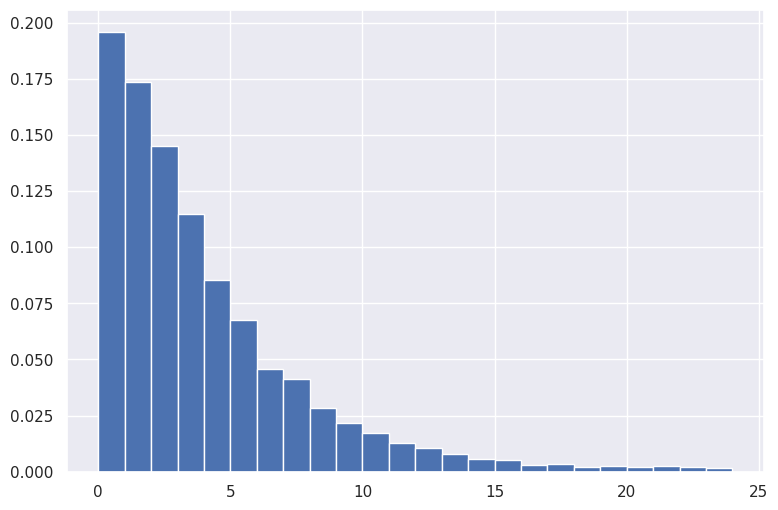

In [ ]:
# plt.hist()*100) 
y_pred = test_i_j[-1].predict(X_1)
plt.hist(sklearn.metrics.mean_absolute_percentage_error(y_pred.reshape(1, -1),y_1.reshape(1, -1), multioutput='raw_values')*100, range(25), density=True)
# plt.xlabel('значения метрики MAPE')
# plt.ylabel('частота')
# скинул леше

In [ ]:
0.19588964 + 0.17371956 + 0.14515738 + 0.11497694 + 0.08528198 +0.06764301+0.0458775+ 0.04110365+ 0.02848127+ 0.02152278+        0.01739623

0.93704994

# Функция для подсчета средней ошибки для графиков

In [152]:
#@title max_graph_er
def max_graph_er(pred, ground_true):

    maxerror = 0 
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(pred[i*20:(i+1)*20], ground_true[i*20:(i+1)*20])*100
        maxerror = cmape if cmape > maxerror else maxerror

    return maxerror

# ВАЛИДАЦИОННЫЙ ДАТАСЕТ ИЗ ЦЕЛОГО ГРАФИКА ВРУЧНУЮ

In [ ]:
X = np.zeros((len(train_list), 4))
y = np.zeros((len(train_list), 20))
for i, job_name in enumerate(train_list):
    red, cal, ha, vel, fric, int_res_stress = get_param(job_name,
                                                        train_list,
                                                        train_arrays)

    X[i] = np.array([red, cal, ha, fric])
    y[i] = int_res_stress

In [ ]:
X_train_fair, X_val_fair, y_train_fair, y_val_fair = train_test_split(X, y, train_size=.8, random_state=50)

In [ ]:
def flatten_r(X_train_fair, y_train_fair):
    X_1 = np.zeros((len(X_train_fair)*20, X_train_fair.shape[1]+1))
    y_1 = np.zeros((len(X_train_fair)*20, ))
    for i in range(len(X_train_fair)):
        for j in range(20):
            X_1[i*20+j] = np.hstack((X_train_fair[i], j/19))
            y_1[i*20+j] = y_train_fair[i][j]
    return X_1, y_1

In [ ]:
X_train_fair, y_train_fair = flatten_r(X_train_fair, y_train_fair)
X_val_fair, y_val_fair = flatten_r(X_val_fair, y_val_fair)
print(X_train_fair.shape, X_val_fair.shape)

(10080, 5) (2520, 5)


In [ ]:
#@title special_ann_stress_strains_val
def special_ann_stress_strains_val(fname, range_layers, range_neurons, X_train_fair, y_train_fair, X_val_fair, y_val_fair, alpha, solver):
    cscores = []
    aics = []
    bics = []
    mapes = []
    mspes = []
    n_layers = []
    n_neurons = []

    all_cscores = []
    all_aics = []
    all_bics = []
    all_mapes = []
    all_mspes = []
    # Simulate train / test / validation sets
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train_fair, y_train_fair, train_size=.6, random_state=100)
    # X_valid, X_test_1, y_valid, y_test_1 = train_test_split(X_hold, y_hold, train_size=.5, random_state=100)

    umozritelnoe_chislo_neironov = 15*100
    K = X_train_1.shape[1]
    n = len(y_test_1)
    v_r2 = ((y_test_1 - y_test_1.mean()) **2).sum()
    all_v_r2 = ((y - y.mean()) **2).sum()
    for j in range_neurons:
        j = j-1
        for i in range_layers:
            hls_tuple = ()
            for _ in range(1, i+1):
                hls_tuple = hls_tuple + (j+1, )
            n_layers.append(i)
            n_neurons.append(j+1)
            regr = make_pipeline(StandardScaler(),
                                MLPRegressor(hidden_layer_sizes=hls_tuple,
                                            #  learning_rate_init=0.0001,
                                            random_state=100,
                                            #  alpha=alpha,
                                             early_stopping=True,
                                             solver=solver,
                                            # verbose=True,
                                            max_iter=45000
                                             ),)
            regr.fit(X_train_1,y_train_1)
            # # Calc R^2
            cscore = regr.score(X_test_1, y_test_1)
            # all_cscore = regr.score(X, y)
            cscores.append(cscore)
            # R^2 to mspe:
            # R^2 = 1 - u / v, where u is sum of square errors ((y_true - y_pred) **2).sum() and v is the total sum of squares ((y_true - y_true.mean()) **2).sum() .
            u_r2 = - (cscore - 1) * v_r2
            # all_u_r2 = - (all_cscore - 1) * all_v_r2
            # Calc AIC
            aic_ = n * np.log(u_r2 / n) + 2*K
            # all_aic_ = n * np.log(all_u_r2 / n) + 2*K
            aics.append(aic_)
            # all_aics.append(all_aic_)

            # Calc BIC
            bic_ = aic_ - 2*K + K*np.log(n)
            # all_bic_ = all_aic_ - 2*K + K*np.log(n)
            bics.append(bic_)
            # all_bics.append(all_bic_)

            # Calc MAPE
            ypred = regr.predict(X_test_1)
            mape = ((abs(ypred - y_test_1)) / (abs(y_test_1) + 1e-8)).mean()*100
            mapes.append(mape)
            mspe = (((abs(ypred - y_test_1)) / (abs(y_test_1) + 1e-8))**2).mean()*100
            mspes.append(mspe)
            
            # all_ypred = regr.predict(X)
            # all_mape = ((np.abs(all_ypred - y)) / (np.abs(y) + 1e-8)).mean()*100
            # all_mapes.append(all_mape)
            # all_mspe = (((np.abs(all_ypred - y)) / (np.abs(y) + 1e-8))**2).mean()*100
            # all_mspes.append(all_mspe)

            
            print(f'for {i:>3} hidden layers of size {j+1:>3}  MAPE = {mape:.3f}, MSPE = {mspe:.3f}, AIC = {aic_:.3f}, cscore = {cscore:.3f}, BIC = {bic_:.3f}')
            # print(f'All MAPE = {all_mape:.3f}, MSPE = {all_mspe:.3f}, AIC = {all_aic_:.3f}, cscore = {all_cscore:.3f}, BIC = {all_bic_:.3f}')
            # to_save_data = {
            #         'n_layers' : n_layers,
            #         'n_neurons' : n_neurons,
            #         'cscores' : cscores,
            #         'aics' : aics,
            #         'bics' : bics,
            #         'mapes' : mapes,
            #         'mspes' : mspes
            #     }

            # to_save_all = {
            #         'n_layers'       : n_layers,
            #         'n_neurons'      : n_neurons,
            #         'all_cscores'    : all_cscores,
            #         'all_aics'       : all_aics,
            #         'all_bics'       : all_bics,
            #         'all_mapes'      : all_mapes,
            #         'all_mspes'      : all_mspes
            #     }

            # json_string = json.dumps(to_save_data)
            # with open('/content/drive/MyDrive/' + fname +'.json', 'w') as outfile:
            #     json.dump(json_string, outfile)
            # json_string = json.dumps(to_save_all)
            # with open('/content/drive/MyDrive/' + fname +'_all.json', 'w') as outfile:
            #     json.dump(json_string, outfile)      

            val_mape = sklearn.metrics.mean_absolute_percentage_error(regr.predict(X_val_fair), y_val_fair)*100
            max_error_on_graph = max_graph_er(regr.predict(X_val_fair), y_val_fair)
            print(f'{solver} for {i:>3} hidden layers of size {j+1:>3} VAL MAPE = {val_mape:.3f}, max_error_on_graph = {max_error_on_graph}')

    return regr          

In [ ]:
 sassv1210 = special_ann_stress_strains_val(fname='test_solver', 
                                        range_layers=[12],
                                        range_neurons= [10],
                                        X_train_fair=X_train_fair, y_train_fair=y_train_fair, X_val_fair=X_val_fair, y_val_fair=y_val_fair,
                                        alpha=0.4, solver='lbfgs')

lbfgs for  12 hidden layers of size  10 VAL MAPE = 8.539, max_error_on_graph = 21.10561109024685


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [ ]:
sassv = special_ann_stress_strains_val(fname='test_solver', 
                                        range_layers=[10],
                                        range_neurons= [10],
                                        X_train_fair=X_train_fair, y_train_fair=y_train_fair, X_val_fair=X_val_fair, y_val_fair=y_val_fair,
                                        alpha=0.4, solver='lbfgs')

lbfgs for  10 hidden layers of size  10 VAL MAPE = 7.759, max_error_on_graph = 19.52704627587112


In [153]:
sassv715 = special_ann_stress_strains_val(fname='test_solver', 
                                        range_layers=[7],
                                        range_neurons= [15],
                                        X_train_fair=X_train_fair, y_train_fair=y_train_fair, X_val_fair=X_val_fair, y_val_fair=y_val_fair,
                                        alpha=0.4, solver='lbfgs')

for   7 hidden layers of size  15  MAPE = 6.799, MSPE = 1.493, AIC = 14018.152, cscore = 0.981, BIC = 14049.662
lbfgs for   7 hidden layers of size  15 VAL MAPE = 7.292, max_error_on_graph = 17.915481526564154


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [ ]:
sassv715 = special_ann_stress_strains_val(fname='test_solver', 
                                        range_layers=[7],
                                        range_neurons= [15],
                                        X_train_fair=X_train_fair, y_train_fair=y_train_fair, X_val_fair=X_val_fair, y_val_fair=y_val_fair,
                                        alpha=0.4, solver='lbfgs')

for   7 hidden layers of size  15  MAPE = 6.799, MSPE = 1.493, AIC = 14018.152, cscore = 0.981, BIC = 14049.662
lbfgs for   7 hidden layers of size  15 VAL MAPE = 7.292, max_error_on_graph = 33.476448173970354


In [ ]:
sassv2010 = special_ann_stress_strains_val(fname='test_solver', 
                                        range_layers=[20],
                                        range_neurons= [10],
                                        X_train_fair=X_train_fair_eps, y_train_fair=y_train_fair_eps, X_val_fair=X_val_fair_eps, y_val_fair=y_val_fair_eps,
                                        alpha=0.4, solver='adam')

adam for  20 hidden layers of size  10 VAL MAPE = 4.562, max_error_on_graph = 12.922422588827551


In [ ]:
sassv1610 = special_ann_stress_strains_val(fname='test_solver', 
                                        range_layers=[16],
                                        range_neurons= [10],
                                        X_train_fair=X_train_fair_eps, y_train_fair=y_train_fair_eps, X_val_fair=X_val_fair_eps, y_val_fair=y_val_fair_eps,
                                        alpha=0.4, solver='adam')

adam for  16 hidden layers of size  10 VAL MAPE = 2.925, max_error_on_graph = 11.76521919294696


In [195]:
sassv1610_ = special_ann_stress_strains_val(fname='test_solver', 
                                        range_layers=[16],
                                        range_neurons= [10],
                                        X_train_fair=X_train_fair_eps, y_train_fair=y_train_fair_eps, X_val_fair=X_val_fair_eps, y_val_fair=y_val_fair_eps,
                                        alpha=0.4, solver='adam')

for  16 hidden layers of size  10  MAPE = 3.161, MSPE = 0.305, AIC = -34843.851, cscore = 0.998, BIC = -34812.341
adam for  16 hidden layers of size  10 VAL MAPE = 2.925, max_error_on_graph = 10.274669747099193


In [ ]:
# Set the font size for the labels and ticks
plt.rcParams['font.size'] = 24
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 20})
sns.set_theme(style='darkgrid')
for i in range(0, len(X_val_fair)//20):
# for i in range(0, 1):
    plt.clf()
        # Plot your data
    fig, ax = plt.subplots(figsize=(10, 8))

    # Show the plot
    # plt.show()
    # X_val_fair_ext = np.zeros((X_val_fair.shape[0]*3, X_val_fair.shape[1]))
    # for q in range(len(X_val_fair_ext)):
    #     for w in range(X_val_fair_ext.shape[1]):
    #         X_val_fair_ext[q][w] = X_val_fair[q//3][w]
    #         X_val_fair_ext[q][-1] = q/59 

    ax.plot(np.linspace(0, 1, 20),
            sassv715.predict(X_val_fair_eps[i*20:(i+1)*20]),
            linewidth=3,
            label='Предсказание модели'
            )
    ax.plot(np.linspace(0, 1, 20),
            y_val_fair_eps[i*20:(i+1)*20],
            linewidth=3,
            label='Истинные данные'
            )
    # sns.axes_style("darkgrid")
    # plt.ylabel(r'$\varepsilon_i, -$', fontsize=24)
    plt.ylabel(r'$\sigma_i, $МПа', fontsize=24)
    plt.xlabel('$r, -$', fontsize=24)

    leg = ax.legend(loc='best', fontsize=24)

    # Make the ticks bigger
    ax.tick_params(axis='both', which='major', labelsize=20)

    # ax.set_title('Title', fontsize=14)
    description_array = X_val_fair[i*20][:-1]
    description = ''
    pars = ['red', 'cal', 'ha', 'fric']
    for co in range(len(description_array)):
        description += pars[co]
        description += str(description_array[co])
        description += '_'
    plt.subplots_adjust(bottom=0.15)

    plt.savefig('/content/drive/MyDrive/7_15+/' + description + '.png')
    # plt.show()

In [ ]:
description

'red0.25_cal0.0_ha20.0_fric0.05_'

In [ ]:
for solver in ('lbfgs', 'adam', 'sgd'):
    special_ann_stress_strains_val(fname='test_solver', 
                                           range_layers=range(12, 21, 4),
                                           range_neurons= [3, 5, 7, 10, 15, 25, 30, 50, 75, 100],
                                           X_train_fair=X_train_fair, y_train_fair=y_train_fair, X_val_fair=X_val_fair, y_val_fair=y_val_fair,
                                           alpha=0.4, solver=solver)

In [190]:
X_eps = np.zeros((len(train_list), 4))
y_eps = np.zeros((len(train_list), 20))
for i, job_name in enumerate(train_list):
    red, cal, ha, vel, fric, int_res_eps = get_param(job_name,
                                                        train_list,
                                                        train_arrays,
                                                        char_1=3
                                                        )

    X_eps[i] = np.array([red, cal, ha, fric])
    y_eps[i] = int_res_eps

In [191]:
X_train_fair_eps, X_val_fair_eps, y_train_fair_eps, y_val_fair_eps = train_test_split(X_eps, y_eps, train_size=.8, random_state=50)

In [192]:
X_train_fair_eps, y_train_fair_eps = flatten_r(X_train_fair_eps, y_train_fair_eps)
X_val_fair_eps, y_val_fair_eps     = flatten_r(X_val_fair_eps, y_val_fair_eps)
print(X_train_fair_eps.shape, X_val_fair_eps.shape)

(10080, 5) (2520, 5)


In [193]:
#@title polynomial fitting strains
# TRAINING ERROR PER DEGREE
# train_rmse_errors_eps = []
# # TEST ERROR PER DEGREE
# test_rmse_errors_eps = []
# mape_errors_eps = []
# mspe_errors_eps = []
# aic_errors_eps = []
# bic_errors_eps = []


for d in [5]:

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features_eps = polynomial_converter.fit_transform(np.vstack((X_train_fair_eps, 
                                                                        X_val_fair_eps)))

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test = poly_features_eps[0: len(X_train_fair_eps)], poly_features_eps[len(X_train_fair_eps):]
    y_train, y_test = y_train_fair_eps.copy(), y_val_fair_eps.copy()
    K = 5
    n = len(y_test)
    
    v_r2 = ((y_test - y_test.mean())**2).sum()

    # TRAIN ON THIS NEW POLY SET
    model_eps = make_pipeline(StandardScaler(),
                              LinearRegression(fit_intercept=True))
    model_eps.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model_eps.predict(X_train)
    test_pred = model_eps.predict(X_test)

    print('.', end='')
    # Calculate Errors

    # Errors on Train Set
    train_RMSE = sklearn.metrics.r2_score(y_train,train_pred)

    # Errors on Test Set
    test_RMSE = sklearn.metrics.r2_score(y_test,test_pred)
    mape = sklearn.metrics.mean_absolute_percentage_error(y_test, test_pred)
    u_r2 = - (test_RMSE - 1) * v_r2
    aic_ = n * np.log(u_r2 / n) + 2*K
    # Calc BIC
    bic_ = aic_ - 2*K + K*np.log(n)
    # Calc MAPE
    mape = ((abs(test_pred - y_test)) / (abs(y_test) + 1e-8)).mean()*100
    mspe = (((abs(test_pred - y_test)) / (abs(y_test) + 1e-8))**2).mean()*100

    # Append errors to lists for plotting later


    # train_rmse_errors_eps.append(train_RMSE)
    # test_rmse_errors_eps.append(test_RMSE)

    # mape_errors_eps.append(mape)
    # mspe_errors_eps.append(mspe)
    # aic_errors_eps.append(aic_)
    # bic_errors_eps.append(bic_)



.

In [194]:
mape, aic_, bic_, test_RMSE

(7.1931963077086065,
 -17333.73986178277,
 -17304.579790880245,
 0.9866437532272304)

In [ ]:
# Set the font size for the labels and ticks
path_graph = '/content/drive/MyDrive/compar_ann+poly/'
if not  os.path.exists(path_graph):
     os.mkdir(path_graph)
plt.rcParams['font.size'] = 24
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 20})
sns.set_theme(style='darkgrid')
# for i in range(0, len(X_val_fair)//20):
for i in [2]:
    plt.clf()
        # Plot your data
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.plot(np.linspace(0, 1, 20),
            model_eps.predict(X_test[i*20:(i+1)*20]),
            linewidth=5,
            label='Предсказание полинома'
            )
    ax.plot(np.linspace(0, 1, 20),
            sassv715.predict(X_val_fair[i*20:(i+1)*20]),
            linewidth=5,
            label='Предсказание ИНС'
            )
    ax.plot(np.linspace(0, 1, 20),
            y_val_fair[i*20:(i+1)*20],
            linewidth=5,
            label='Истинные данные'
            )
    # sns.axes_style("darkgrid")
    plt.ylabel(r'$\varepsilon_i, -$', fontsize=42)
    # plt.ylabel(r'$\sigma_i, $МПа', fontsize=42)
    plt.xlabel('$r, -$', fontsize=42)

    leg = ax.legend(loc='best', fontsize=28)

    # Make the ticks bigger
    ax.tick_params(axis='both', which='major', labelsize=30)

    # ax.set_title('Title', fontsize=14)
    description_array = X_val_fair[i*20][:-1]
    description = ''
    pars = ['red', 'cal', 'ha', 'fric']
    for co in range(len(description_array)):
        description += pars[co]
        description += str(description_array[co])
        description += '_'
    # plt.subplots_adjust(bottom=0.15)
    # plt.subplots_adjust(right=0.8)

    ax.set_position([0.2, 0.15, 0.75, 0.8])

    # if description in ['red0.05_cal0.0_ha16.0_fric0.05_']:#,
                    #    'red0.15_cal0.3_ha20.0_fric0.1_',
                    #    'red0.1_cal1.0_ha4.0_fric0.025_']:
    plt.savefig(path_graph + description + '.png')
    plt.show()
    plt.close()

NameError: ignored

In [ ]:
description

'red0.015_cal0.3_ha4.0_fric0.1_'

In [ ]:
#@title max_graph_er
def max_graph_er(pred, ground_true):

    maxerror = 0 
    for i in range(0, len(pred)//20):
        # cmape = sklearn.metrics.mean_absolute_percentage_error(pred[i*20:(i+1)*20], ground_true[i*20:(i+1)*20])*100
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20])*100
        maxerror = cmape if cmape > maxerror else maxerror

    return maxerror

In [ ]:
max_graph_er(model_eps.predict(X_test), y_val_fair_eps)

52.64692752418594

Text(0, 0.5, 'частота')

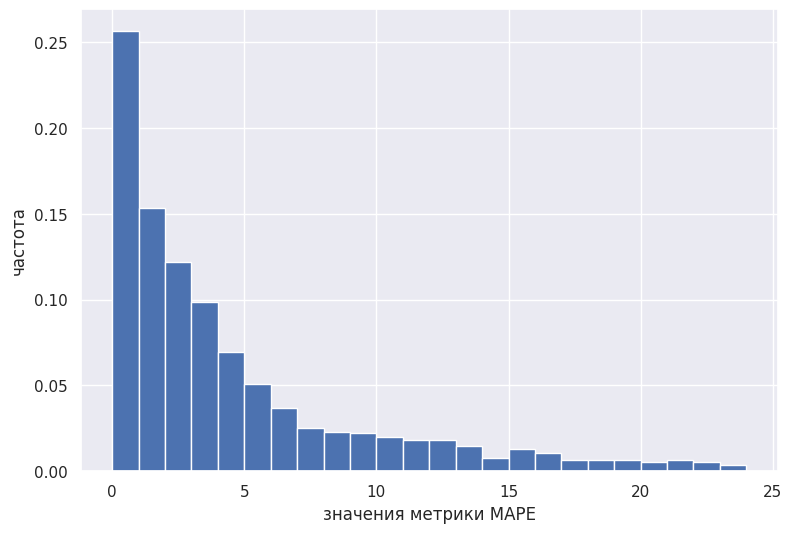

In [ ]:
# y_pred = best_for_strains.predict(X_1_eps)
plt.hist(sklearn.metrics.mean_absolute_percentage_error(y_val_fair_eps.reshape(1, -1),model_eps.predict(X_test).reshape(1, -1), multioutput='raw_values')*100, range(25), density=True)
plt.xlabel('значения метрики MAPE')
plt.ylabel('частота')

In [ ]:
def plotHistogram(p, o):
    """
    p and o are iterables with the values you want to
    plot the histogram of
    """
    plt.hist([p, o], color=['g','r'], alpha=0.8, bins=50)
    plt.show()

In [ ]:
sns.histplot(sklearn.metrics.mean_absolute_percentage_error( y_val_fair_eps.reshape(1, -1),sassv1610_.predict(X_val_fair_eps).reshape(1, -1), multioutput='raw_values')*100
            , bins=range(40),
             stat='density', fill=True,
              kde = True                #   
             ,
             )
sns.histplot(              sklearn.metrics.mean_absolute_percentage_error(y_val_fair_eps.reshape(1, -1),model_eps.predict(X_test).reshape(1, -1), multioutput='raw_values')*100
            , bins=range(40),
             stat='density', fill=True,
              kde = True                #   
             ,
             ).set(xlim=(0, 40))

In [167]:
from matplotlib.lines import Line2D
import seaborn as sns

sns.axline = Line2D

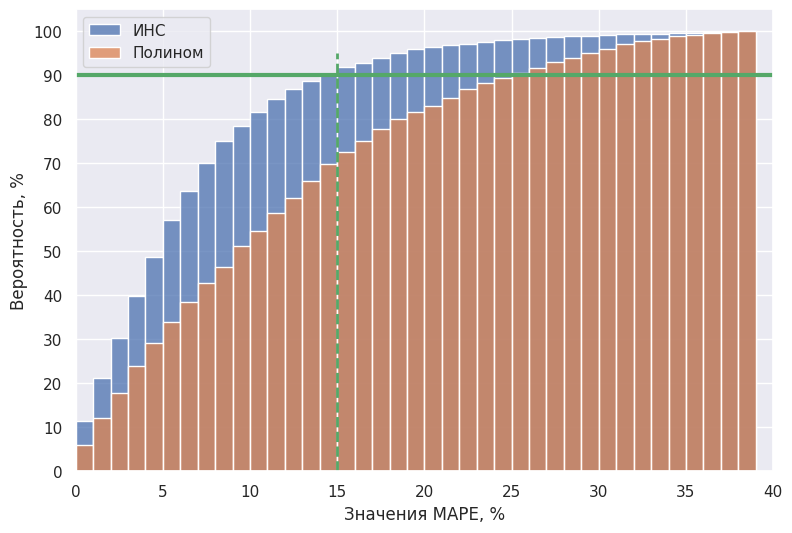

In [189]:
sns.histplot(sklearn.metrics.mean_absolute_percentage_error( y_val_fair.reshape(1, -1),sassv715.predict(X_val_fair).reshape(1, -1), multioutput='raw_values')*100
            , bins=range(40),
             stat='percent', fill=True,
            #   ,kde = True                #   
             
             cumulative=True,
             label='ИНС'
             )
g = sns.histplot(sklearn.metrics.mean_absolute_percentage_error(y_val_fair.reshape(1, -1),model_eps.predict(X_test).reshape(1, -1), multioutput='raw_values')*100
            , bins=range(40),
             stat='percent', fill=True,
            #   ,kde = True                #   
             cumulative=True,
             label='Полином'
             ).set(xlim=(0, 40), xlabel='Значения MAPE, %', ylabel='Вероятность, %')
plt.plot([0, 40], [90, 90], linewidth=3, color='g')
plt.plot([15, 15], [0, 95], linewidth=2, color='g', linestyle='--')
plt.yticks(np.arange(0, 101, 10))
plt.legend()

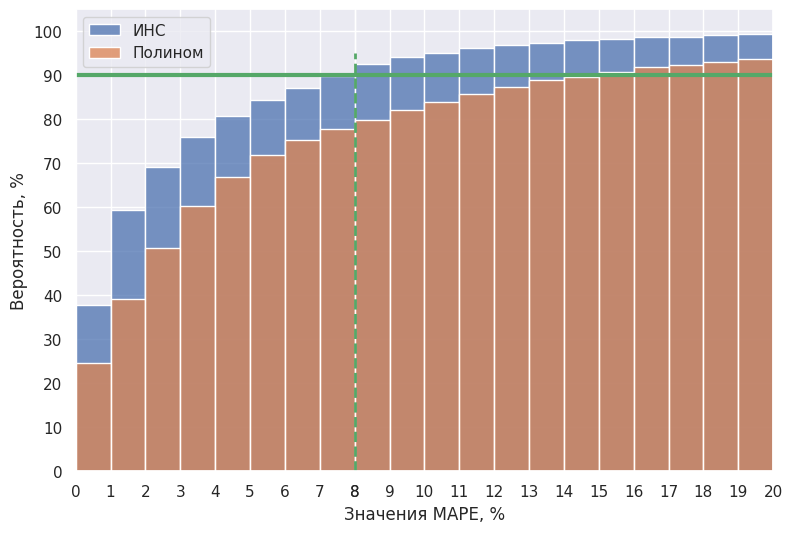

In [212]:
sns.histplot(sklearn.metrics.mean_absolute_percentage_error(y_val_fair_eps.reshape(1, -1),sassv1610_.predict(X_val_fair_eps).reshape(1, -1), multioutput='raw_values')*100
            , bins=range(40),
             stat='percent', fill=True,
            #   ,kde = True                #   
             
             cumulative=True,
             label='ИНС'
             )
g = sns.histplot(sklearn.metrics.mean_absolute_percentage_error(y_val_fair_eps.reshape(1, -1),model_eps.predict(X_test).reshape(1, -1), multioutput='raw_values')*100
            , bins=range(40),
             stat='percent', fill=True,
            #   ,kde = True                #   
             cumulative=True,
             label='Полином'
             ).set(xlim=(0, 20), xlabel='Значения MAPE, %', ylabel='Вероятность, %')
plt.plot([0, 40], [90, 90], linewidth=3, color='g')
# plt.plot([0, 40], [95, 95], linewidth=3, color='g')
plt.plot([8, 8], [0, 95], linewidth=2, color='g', linestyle='--')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(np.concatenate((np.arange(0, 21, 1), [8])))
plt.legend()

Text(0, 0.5, 'частота')

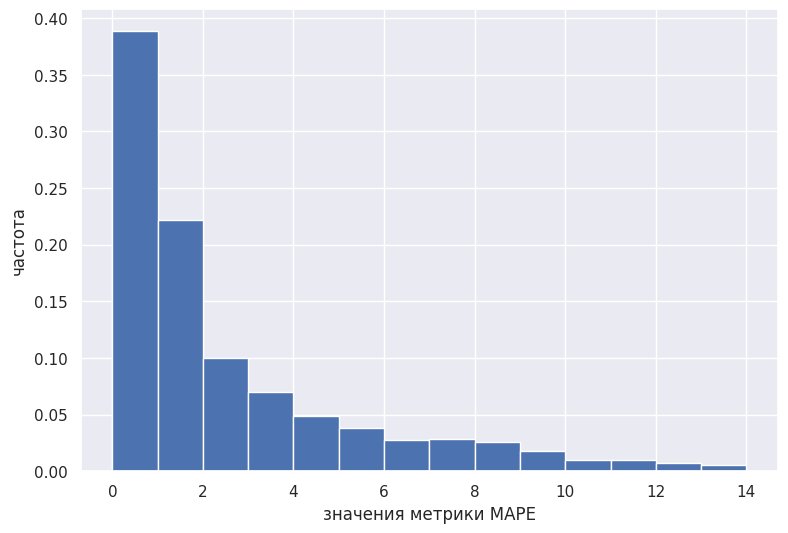

In [ ]:
# y_pred = best_for_strains.predict(X_1_eps)
plt.hist(sklearn.metrics.mean_absolute_percentage_error( y_val_fair_eps.reshape(1, -1),sassv1610_.predict(X_val_fair_eps).reshape(1, -1), multioutput='raw_values')*100, range(15),  density=True)
plt.xlabel('значения метрики MAPE')
plt.ylabel('частота')

Text(0, 0.5, 'вероятность')

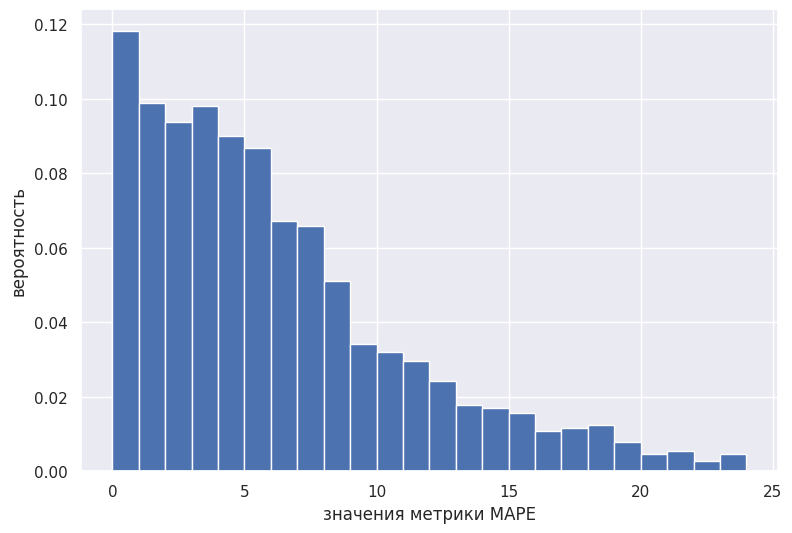

In [ ]:
# y_pred = best_for_strains.predict(X_1_eps)
plt.hist([
    sklearn.metrics.mean_absolute_percentage_error( y_val_fair.reshape(1, -1),sassv715.predict(X_val_fair).reshape(1, -1), multioutput='raw_values')*100,
    sklearn.metrics.mean_absolute_percentage_error( y_val_fair.reshape(1, -1),sassv715.predict(X_val_fair).reshape(1, -1), multioutput='raw_values')*100,
    ],
    range(25),  density=True)
plt.xlabel('значения метрики MAPE')
plt.ylabel('плотность распределения вероятности')

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning:

invalid value encountered in true_divide



Text(0, 0.5, 'частота')

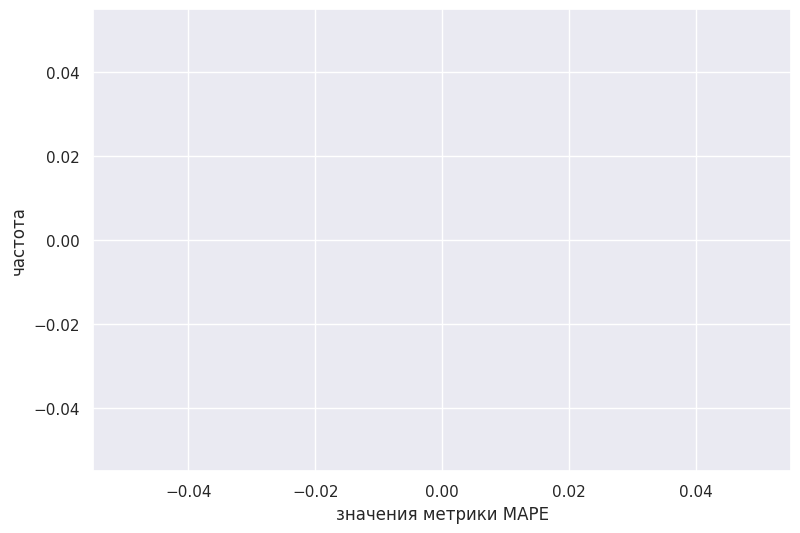

In [ ]:
# y_pred = best_for_strains.predict(X_1_eps)
plt.hist(sklearn.metrics.mean_absolute_percentage_error(y_val_fair.reshape(1, -1),model_eps.predict(X_test).reshape(1, -1), multioutput='raw_values')*100, range(65), density=True)
plt.xlabel('значения метрики MAPE')
plt.ylabel('частота')

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning:

invalid value encountered in true_divide



Text(0, 0.5, 'частота')

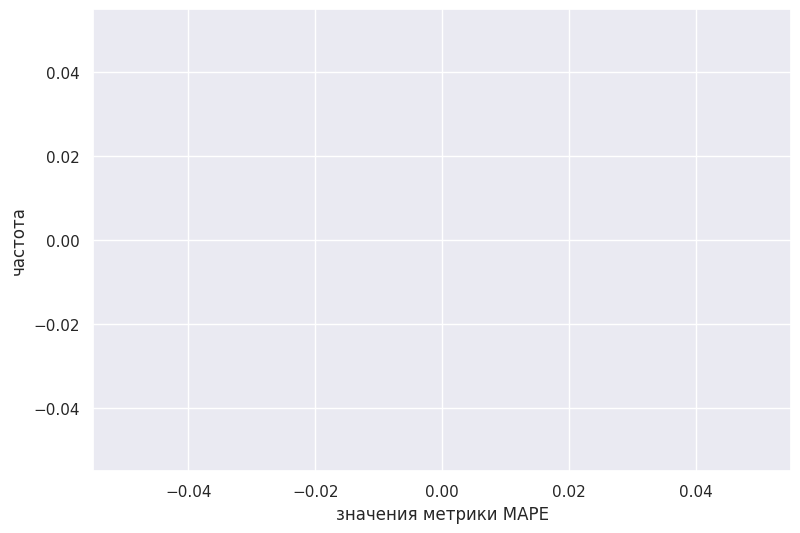

In [ ]:
# y_pred = best_for_strains.predict(X_1_eps)
plt.hist(sklearn.metrics.mean_absolute_percentage_error(y_val_fair.reshape(1, -1),model_eps.predict(X_test).reshape(1, -1), multioutput='raw_values')*100, range(65), density=True)
plt.xlabel('значения метрики MAPE')
plt.ylabel('частота')